In [3]:
import os 
os.chdir('C:\\Users\\bero\\Desktop\\image_processing_handwork\\week_4')
os.listdir()

['.ipynb_checkpoints', 'mnist_test.csv', 'mnist_train.csv', 'week_4.ipynb']

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
data_path = "C:\\Users\\bero\\Desktop\\image_processing_handwork\\week_4"
train_data= np.loadtxt( data_path + "//mnist_train.csv"  , delimiter=",")
test_data = np.loadtxt(data_path + "//mnist_test.csv" , delimiter=",")

In [8]:
image_size = 28 #boy ve uzunluk
no_of_different_labels = 10 # örneğin 0,1,2,3,...,9
image_pixels = image_size * image_size

In [9]:
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [43]:
train_data.ndim, train_data.shape    # 785=28*28+1   Her bir resmin boyutları 


(2, (60000, 785))

In [44]:
train_data[10,:]                  # 10. satıra ait ilk eleman

array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  42., 118., 219., 166., 118., 118.,   6.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

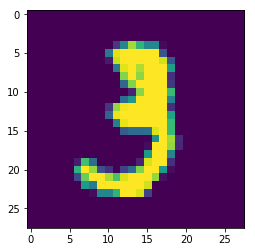

In [24]:
#training for 10  row and 785
im_3=train_data[10,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5)
plt.show()

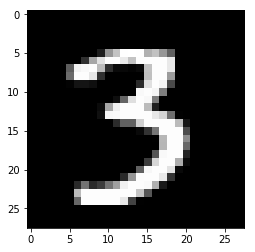

In [47]:
 #training for 10000 row and 785
im_3=train_data[10000,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5,cmap='gray')
plt.show()

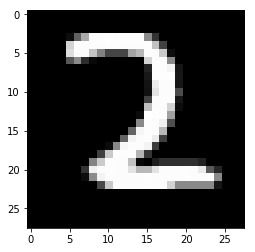

In [26]:
#training for 19999 row and 785
im_3=train_data[19999,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5,cmap='gray')
plt.show()

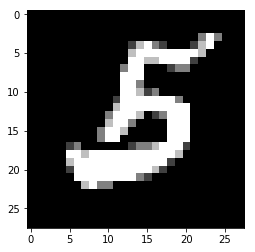

In [34]:
#training for 39999 row and 785
im_3=train_data[39999,:]
im_3.shape
im_4=im_3[1:]
im_4.shape
im_5=im_4.reshape(28,28)
plt.imshow(im_5,cmap='gray')
plt.show()

In [48]:
#rakamlardan kaçar tane olduğunu bulan fonksiyon:

m,n=train_data.shape
m,n #sonuç=(60000,785)

def my_count(k=0):
    s=0
    for i in range (m):
        if(train_data[i,0]==k):
            s=s+1
    return s #kaç tane k değeri olduğunu bastırır.
for i in range(10):
    c=my_count(i)
    print(i," ",c) # 0-10 sayılarından kaçar tane olduğunu yazdırır.

0   5923
1   6742
2   5958
3   6131
4   5842
5   5421
6   5918
7   6265
8   5851
9   5949


In [49]:
#train_data[i,0]  #değeri söyler
#train_data[i,1]  #sol üstteki pixel
#train_data[i,784] #sağ alttaki değer

In [50]:
import math
def my_pdf_1(x,mu=0.0,sigma=1.0):
    x=float(x-mu)/sigma
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)/sigma

In [51]:
#değeri 0 olan resimlerin sol üstteki pixelin ortalama ve standart sapmasını bulan fonksiyon:
s,t,k=0,0,0
l=350 #lokasyon
for i in range (m):
    if(train_data[i,0]==k):
        s=s+1 #kaç tane var
        t=t+train_data[i,l+1] #instensity değerleri
mean_1=t/s #ortalama
s,t=0,0
for i in range (m):
    if(train_data[i,0]==k):
        s=s+1 #kaç tane var
        diff_1=train_data[i,l+1]-mean_1
        t=t+diff_1*diff_1
std_1=np.sqrt(t/(s-1))
print(mean_1,std_1)

22.705723450953908 61.8672005389669


In [52]:
s=0
for i in range(m):
    if (train_data[i,0]==3):
        s=s+1
        
s #train_data nın ilk sütununda kaç tane 3 var

6131

In [56]:
#yukarıdaki kodları fonksiyon haline getirdik: 
def get_my_mean_and_std(k=0,l=0):
    s=0
    t=0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            t=t+train_data[i,l+1]
    mean_1=t/s

    s,t=0,0
    for i in range(m):
        if(train_data[i,0]==k):
            s=s+1
            diff_1=train_data[i,l+1]-mean_1
            t=t+diff_1*diff_1
    std_1=np.sqrt(t/(s-1))
    return mean_1,std_1

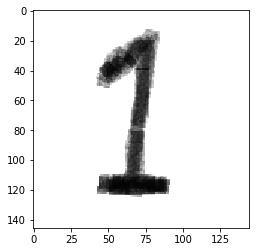

In [57]:
im_1=plt.imread('bir.png')
plt.imshow(im_1)
plt.show()
test_value=im_1[0,0,0]

In [58]:
m_1,std_1=get_my_mean_and_std(2,100)
my_pdf_1(test_value,m_1,std_1)

0.0046815945920497095